In [79]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from skimage.measure import block_reduce
from scipy.stats import pearsonr
import sys
sys.path.insert(0,'..')
from dataloader import DataLoaderDALES, DataLoaderMicroHH
from functions import vint

In [113]:
# Run specifics
lp = '/Users/martinjanssens/Documents/Wageningen/Patterns-in-satellite-images/BOMEXStability/bomex200_e12/ppagg_ql'
lp = '/Users/martinjanssens/Documents/Wageningen/EUREC4A/moisture_circulation/eurec4a_mean/ppagg'
sp = lp+'/../figs'
mod = 'dales'

if mod == 'dales':
    dl = DataLoaderDALES(lp+'/..')
elif mod == 'microhh':
    dl = DataLoaderMicroHH(lp+'/..')
    
time1d = dl.time1d
rhobf = dl.rhobf

# Larger-scale processes
zf_inp = dl.zf_inp
wfls = dl.wfls
dqdt_ls = dl.dqdt_ls
dthldt_ls = dl.dthldt_ls

time = np.load(lp+'/time.npy')
plttime = np.load(lp+'/plttime.npy')
zflim = np.load(lp+'/zf.npy')

dzh = np.diff(zflim)[0] # FIXME only valid in lower part of domain

izmin = np.where(zflim[0] >= zf_inp)[0][0]
izmax = np.where(zflim[-1] <= zf_inp)[0][0]+1

rhobfi = rhobf[0,izmin:izmax] # Won't really change much through time, so ok to take 0 value

qtpf_moist_time = np.load(lp+'/qtpf_moist_time.npy')
qtpf_dry_time = np.load(lp+'/qtpf_dry_time.npy')
qtpf_prod_moist_time = np.load(lp+'/qtpf_prod_moist_time.npy')
qtpf_prod_dry_time = np.load(lp+'/qtpf_prod_dry_time.npy')
qtpf_prod_moist_wex_time = np.load(lp+'/qtpf_prod_moist_wex_time.npy')
qtpf_prod_dry_wex_time = np.load(lp+'/qtpf_prod_dry_wex_time.npy')
qtpf_vdiv_moist_time = np.load(lp+'/qtpf_vdiv_moist_time.npy')
qtpf_vdiv_dry_time = np.load(lp+'/qtpf_vdiv_dry_time.npy')
qtpf_hdiv_moist_time = np.load(lp+'/qtpf_hdiv_moist_time.npy')
qtpf_hdiv_dry_time = np.load(lp+'/qtpf_hdiv_dry_time.npy')
qtpf_subs_moist_time = np.load(lp+'/qtpf_subs_moist_time.npy')
qtpf_subs_dry_time = np.load(lp+'/qtpf_subs_dry_time.npy')
qtpf_diff_moist_time = np.load(lp+'/qtpf_diff_moist_time.npy')
qtpf_diff_dry_time = np.load(lp+'/qtpf_diff_dry_time.npy')
qtpf_micr_moist_time = np.load(lp+'/qtpf_micr_moist_time.npy')
qtpf_micr_dry_time = np.load(lp+'/qtpf_micr_dry_time.npy')

thlvpf_moist_time = np.load(lp+'/thlvpf_moist_time.npy')
thlvpf_dry_time = np.load(lp+'/thlvpf_dry_time.npy')
thlvpf_prod_moist_time = np.load(lp+'/thlvpf_prod_moist_time.npy')
thlvpf_prod_dry_time = np.load(lp+'/thlvpf_prod_dry_time.npy')
thlvpf_vdiv_moist_time = np.load(lp+'/thlvpf_vdiv_moist_time.npy')
thlvpf_vdiv_dry_time = np.load(lp+'/thlvpf_vdiv_dry_time.npy')
thlvpf_hdiv_moist_time = np.load(lp+'/thlvpf_hdiv_moist_time.npy')
thlvpf_hdiv_dry_time = np.load(lp+'/thlvpf_hdiv_dry_time.npy')
thlvpf_subs_moist_time = np.load(lp+'/thlvpf_subs_moist_time.npy')
thlvpf_subs_dry_time = np.load(lp+'/thlvpf_subs_dry_time.npy')
thlvpf_diff_moist_time = np.load(lp+'/thlvpf_diff_moist_time.npy')
thlvpf_diff_dry_time = np.load(lp+'/thlvpf_diff_dry_time.npy')
thlvpf_radi_moist_time = np.load(lp+'/thlvpf_radi_moist_time.npy')
thlvpf_radi_dry_time = np.load(lp+'/thlvpf_radi_dry_time.npy')
thlvpf_micr_moist_time = np.load(lp+'/thlvpf_micr_moist_time.npy')
thlvpf_micr_dry_time = np.load(lp+'/thlvpf_micr_dry_time.npy')

thlvpp_moist_time = np.load(lp+'/thlvpp_moist_time.npy')
thlvpp_dry_time = np.load(lp+'/thlvpp_dry_time.npy')
thlvpp_prod_moist_time = np.load(lp+'/thlvpp_prod_moist_time.npy')
thlvpp_prod_dry_time = np.load(lp+'/thlvpp_prod_dry_time.npy')
thlvpp_vdiv_moist_time = np.load(lp+'/thlvpp_vdiv_moist_time.npy')
thlvpp_vdiv_dry_time = np.load(lp+'/thlvpp_vdiv_dry_time.npy')
thlvpp_hdiv_moist_time = np.load(lp+'/thlvpp_hdiv_moist_time.npy')
thlvpp_hdiv_dry_time = np.load(lp+'/thlvpp_hdiv_dry_time.npy')
thlvpp_subs_moist_time = np.load(lp+'/thlvpp_subs_moist_time.npy')
thlvpp_subs_dry_time = np.load(lp+'/thlvpp_subs_dry_time.npy')
thlvpp_diff_moist_time = np.load(lp+'/thlvpp_diff_moist_time.npy')
thlvpp_diff_dry_time = np.load(lp+'/thlvpp_diff_dry_time.npy')

wthlvpf_prod_moist_time = np.load(lp+'/wthlvpf_prod_moist_time.npy')
wthlvpf_prod_dry_time =  np.load(lp+'/wthlvpf_prod_dry_time.npy')
wthlvpf_vdiv_moist_time =  np.load(lp+'/wthlvpf_vdiv_moist_time.npy')
wthlvpf_vdiv_dry_time = np.load(lp+'/wthlvpf_vdiv_dry_time.npy')
wthlvpf_hdiv_moist_time = np.load(lp+'/wthlvpf_hdiv_moist_time.npy')
wthlvpf_hdiv_dry_time = np.load(lp+'/wthlvpf_hdiv_dry_time.npy')
wthlvpf_buoy_moist_time = np.load(lp+'/wthlvpf_buoy_moist_time.npy')
wthlvpf_buoy_dry_time = np.load(lp+'/wthlvpf_buoy_dry_time.npy')
wthlvpf_pres_moist_time = np.load(lp+'/wthlvpf_pres_moist_time.npy')
wthlvpf_pres_dry_time = np.load(lp+'/wthlvpf_pres_dry_time.npy')
wthlvpf_subs_moist_time = np.load(lp+'/wthlvpf_subs_moist_time.npy')
wthlvpf_subs_dry_time = np.load(lp+'/wthlvpf_subs_dry_time.npy')
wthlvpf_diff_moist_time = np.load(lp+'/wthlvpf_diff_moist_time.npy')
wthlvpf_diff_dry_time = np.load(lp+'/wthlvpf_diff_dry_time.npy')

qlpf_vdiv_moist_time = np.load(lp+'/qlpf_vdiv_moist_time.npy')
qlpf_vdiv_dry_time = np.load(lp+'/qlpf_vdiv_dry_time.npy')

thl_av_time = np.load(lp+'/thl_av_time.npy')
thlv_av_time = np.load(lp+'/thlv_av_time.npy')
qt_av_time = np.load(lp+'/qt_av_time.npy')

thlpf_moist_time = np.load(lp+'/thlpf_moist_time.npy')
thlpf_dry_time = np.load(lp+'/thlpf_dry_time.npy')
wff_moist_time = np.load(lp+'/wff_moist_time.npy')
wff_dry_time = np.load(lp+'/wff_dry_time.npy')
qlpf_moist_time = np.load(lp+'/qlpf_moist_time.npy') 
qlpf_dry_time = np.load(lp+'/qlpf_dry_time.npy')

thlpp_moist_time = np.load(lp+'/thlpp_moist_time.npy')
thlpp_dry_time = np.load(lp+'/thlpp_dry_time.npy')
wfp_moist_time = np.load(lp+'/wfp_moist_time.npy')
wfp_dry_time = np.load(lp+'/wfp_dry_time.npy')
qlpp_moist_time = np.load(lp+'/qlpp_moist_time.npy') 
qlpp_dry_time = np.load(lp+'/qlpp_dry_time.npy')

wthlp_av_time = np.load(lp+'/wthlp_av_time.npy')
wthlpf_moist_time = np.load(lp+'/wthlpf_moist_time.npy')
wthlpf_dry_time = np.load(lp+'/wthlpf_dry_time.npy')

wqtp_av_time = np.load(lp+'/wqtp_av_time.npy')
wqtpf_moist_time = np.load(lp+'/wqtpf_moist_time.npy')
wqtpf_dry_time = np.load(lp+'/wqtpf_dry_time.npy')

wqlp_av_time = np.load(lp+'/wqlp_av_time.npy')
wqlpf_moist_time = np.load(lp+'/wqlpf_moist_time.npy')
wqlpf_dry_time = np.load(lp+'/wqlpf_dry_time.npy')
wqlpf_l_moist_time = np.load(lp+'/wqlpf_l_moist_time.npy')
wqlpf_l_dry_time = np.load(lp+'/wqlpf_l_dry_time.npy')
wqlpf_c_moist_time = np.load(lp+'/wqlpf_c_moist_time.npy')
wqlpf_c_dry_time = np.load(lp+'/wqlpf_c_dry_time.npy')
wqlpf_r_moist_time = np.load(lp+'/wqlpf_r_moist_time.npy')
wqlpf_r_dry_time = np.load(lp+'/wqlpf_r_dry_time.npy')

wthlvp_av_time = np.load(lp+'/wthlvp_av_time.npy')
wthlvpf_moist_time = np.load(lp+'/wthlvpf_moist_time.npy')
wthlvpf_dry_time = np.load(lp+'/wthlvpf_dry_time.npy')
wthlvpf_l_moist_time = np.load(lp+'/wthlvpf_l_moist_time.npy')
wthlvpf_l_dry_time = np.load(lp+'/wthlvpf_l_dry_time.npy')
wthlvpf_c_moist_time = np.load(lp+'/wthlvpf_c_moist_time.npy')
wthlvpf_c_dry_time = np.load(lp+'/wthlvpf_c_dry_time.npy')
wthlvpf_r_moist_time = np.load(lp+'/wthlvpf_r_moist_time.npy')
wthlvpf_r_dry_time = np.load(lp+'/wthlvpf_r_dry_time.npy')
wthlvpp_moist_time = np.load(lp+'/wthlvpp_moist_time.npy')
wthlvpp_dry_time = np.load(lp+'/wthlvpp_dry_time.npy')

# Flux anomaly
wthlvpf_moist_anom = wthlvpf_moist_time - wthlvp_av_time
wthlvpf_dry_anom = wthlvpf_dry_time - wthlvp_av_time

# Buoyancy approximation
thvpf_moist_time = thlvpf_moist_time + 7*thl_av_time*qlpf_moist_time
thvpf_dry_time = thlvpf_dry_time + 7*thl_av_time*qlpf_dry_time

# Mean ql (we don't have this from stats3d)
ql_av_1d = dl.load_qlav(izmin, izmax)

# Slopes of mean profiles
Gamma_thlv = thlvpf_prod_moist_time/wff_moist_time[:,1:-1]
Gamma_qt = qtpf_prod_moist_wex_time/wff_moist_time[:,1:-1]

# Tendencies of variables of interest
def tderive(var,time):
    return ((var[1:,1:-1] - var[:-1,1:-1])
           /(time[1:,np.newaxis] - time[:-1,np.newaxis])/3600)


qtpf_tend_moist_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_dry_time = np.zeros(qtpf_prod_moist_time.shape)
qtpf_tend_moist_time[1:,:] = tderive(qtpf_moist_time, time)
qtpf_tend_dry_time[1:,:] = tderive(qtpf_dry_time, time)

thlvpf_tend_moist_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_dry_time = np.zeros(thlvpf_prod_moist_time.shape)
thlvpf_tend_moist_time[1:,:] = tderive(thlvpf_moist_time, time)
thlvpf_tend_dry_time[1:,:] = tderive(thlvpf_dry_time, time)

wthlvpf_tend_moist_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_dry_time = np.zeros(wthlvpf_prod_moist_time.shape)
wthlvpf_tend_moist_time[1:,:] = tderive(wthlvpf_moist_anom, time)
wthlvpf_tend_dry_time[1:,:] = tderive(wthlvpf_dry_anom, time)


## Reconstruct slab-mean budget terms

thl_av_1d = dl.load_thlav(izmin, izmax)
qt_av_1d = dl.load_qtav(izmin, izmax)
thlv_av_1d = thl_av_1d*(1 + 0.608*qt_av_1d)

# Tendencies
ddt_thlv_av_time = tderive(thlv_av_1d, time1d/3600)
ddt_qt_av_time = tderive(qt_av_1d, time1d/3600)

# Flux divergence (approximately, i.e. ignoring rho)
wthl_av = dl.load_wthlav(izmin, izmax)
wqt_av = dl.load_wqtav(izmin, izmax)
wthlv_av = wthl_av + 0.608*thl_av_1d*wqt_av

ddz_wthlv_av_time = ((wthlv_av[:,1:] - wthlv_av[:,:-1])/dzh)
ddz_wqt_av_time = ((wqt_av[:,1:] - wqt_av[:,:-1])/dzh)

ddz_wthlv_av_time = (ddz_wthlv_av_time[:,1:] + ddz_wthlv_av_time[:,:-1])*0.5
ddz_wqt_av_time = (ddz_wqt_av_time[:,1:] + ddz_wqt_av_time[:,:-1])*0.5

# Subsidence
Gamma_thlv_1d = (thlv_av_1d[:,1:] - thlv_av_1d[:,:-1])/dzh
Gamma_thlv_1d = (Gamma_thlv_1d[:,1:] + Gamma_thlv_1d[:,:-1])/2.

Gamma_qt_1d = (qt_av_1d[:,1:] - qt_av_1d[:,:-1])/dzh
Gamma_qt_1d = (Gamma_qt_1d[:,1:] + Gamma_qt_1d[:,:-1])/2.

wfls_dthlvdz_av_time = wfls[izmin+1:izmax-1]*Gamma_thlv_1d
wfls_dqtdz_av_time = wfls[izmin+1:izmax-1]*Gamma_qt_1d

# Large scale warming
dqdt_ls = dqdt_ls[izmin:izmax]
dthldt_ls = dthldt_ls[izmin:izmax]
dthlvdt_ls = dthldt_ls + 0.608*thl_av_1d*dqdt_ls

Initialising dataloader...
Set paths to all datasets and extracted dimensions


/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/martinjanssens/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


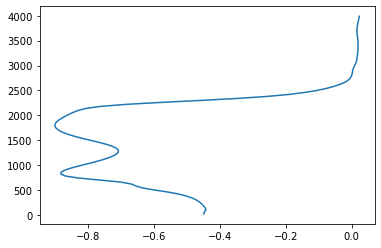

In [114]:
# Attempt to correlate:
# - qtm, qtd, i.e. moisture profiles averaged over around half the columns (by their moisture content)
# - Subcloud layer divergence, i.e. -d/dz(wpf), in the same moist/dry regions
# As function of height

# qtm/qtd
qtm = qt_av_time + qtpf_moist_time
qtd = qt_av_time + qtpf_dry_time

# Subcloud div.
divpm = -(wff_moist_time[:,1:] - wff_moist_time[:,:-1])/(zflim[1:] - zflim[:-1])
divpd = -(wff_dry_time[:,1:] - wff_dry_time[:,:-1])/(zflim[1:] - zflim[:-1])

# Where is cloud base?
zcb1d = np.zeros(ql_av_1d.shape[0])
for i in range(len(zcb1d)):
    try:
        zcb1d[i] = zflim[ql_av_1d[i,:]>1e-8][0]
    except:
        zcb1d[i] = 0
fzcb = interp1d(time1d/3600,zcb1d)
zcb = fzcb(time)

zflim_exp = np.ones((time.size,zflim.size))*zflim
izcb = np.argmin(np.abs(zflim_exp - zcb[:,np.newaxis]),axis=1)

# Subcloud layer average
Dscm = np.zeros(time.size)
Dscd = np.zeros(time.size)
for i in range(time.size):
    Dscm[i] = np.mean(divpm[i,:izcb[i]])
    Dscd[i] = np.mean(divpd[i,:izcb[i]])


# Correlate
it0 = 40
Dsc_con = np.stack([Dscm[it0:],Dscd[it0:]]).flatten()
qt_con = np.stack([qtm[it0:,:],qtd[it0:,:]]).reshape((2*(time.size-it0),zflim.size))
divp_con = np.stack([divpm[it0:,:],divpd[it0:,:]]).reshape((2*(time.size-it0),zflim.size-1))

r_Dsc_qt = np.zeros(zflim.size)
for i in range(zflim.size):
    r_Dsc_qt[i] = pearsonr(Dsc_con,qt_con[:,i])[0]
r_Dsc_D = np.zeros(zflim.size-1)
for i in range(zflim.size-1):    
    r_Dsc_D[i] = pearsonr(Dsc_con,divp_con[:,i])[0]

# Plot
plt.plot(r_Dsc_qt,zflim)
# plt.plot(r_Dsc_D,zflim[:-1])